# Comparação de algoritmos de modelos


Este notebook faz parte de uma série de experimentos voltados para a aplicação de técnicas de aprendizado de máquina em problemas relacionados a dados esportivos, especificamente no contexto de competições de futebol. O objetivo é desenvolver modelos preditivos capazes de gerar insights e previsões valiosas a partir de dados históricos.

Neste primeiro exemplo, nos concentramos na previsão do vencedor de partidas com base em características das equipes e das partidas. A abordagem envolve a construção, avaliação e comparação de vários modelos de machine learning, com a otimização de hiperparâmetros para melhorar o desempenho. No entanto, este notebook também serve como uma base para a aplicação de diferentes técnicas preditivas em outros contextos esportivos, como a previsão de número de gols, desempenho de jogadores, classificação em campeonatos, entre outros.

A estrutura do notebook segue um fluxo padrão de um pipeline de aprendizado de máquina:

1. Carregamento e pré-processamento dos dados: Incluindo a preparação das features e dos rótulos.
2. Treinamento de múltiplos modelos: Modelos supervisionados são aplicados para resolver o problema de previsão.
3. Avaliação dos modelos: Comparação das principais métricas de cada modelo para determinar o mais eficiente.
4. Otimização de hiperparâmetros: Melhoria dos modelos por meio de ajustes finos de parâmetros.
5. Visualização de resultados: Uso de gráficos para facilitar a interpretação das performances dos modelos.

Este fluxo pode ser adaptado e estendido para outros cenários preditivos, permitindo que novas análises e previsões sejam exploradas em futuras versões deste notebook.


# Modelo de quem vai ganhar


Esta seção tem como objetivo criar e comparar diversos algoritmos de machine learning para prever o vencedor de partidas de futebol. A base de dados utilizada contém informações de várias equipes, e o objetivo final é desenvolver um modelo robusto para prever o time vencedor com base nas características do jogo. Além disso, realizaremos a otimização dos hiperparâmetros do melhor modelo encontrado para maximizar sua performance.


## 1. Introdução


O problema de previsão de resultados em esportes envolve diversas variáveis e padrões complexos, que podem ser capturados por diferentes técnicas de aprendizado de máquina. Neste notebook, trabalharemos com diferentes modelos de classificação e compararemos suas performances. Os algoritmos serão treinados com um conjunto de dados histórico, contendo informações sobre as equipes, as partidas, e o vencedor de cada partida.

O fluxo de trabalho deste notebook segue as etapas tradicionais de um pipeline de machine learning:

Carregamento e pré-processamento dos dados: Dividimos os dados em variáveis independentes (features) e dependentes (rótulo), realizamos o split entre treino e teste, e padronizamos as variáveis numéricas, se necessário.
Treinamento de múltiplos modelos: Diversos algoritmos de classificação serão utilizados para prever o vencedor de cada partida.
Avaliação dos modelos: Utilizaremos métricas como accuracy_score, precision, recall e f1_score para medir a performance dos modelos.
Otimização de hiperparâmetros: Aplicaremos o GridSearchCV para ajustar os hiperparâmetros do modelo que apresentar o melhor desempenho.


## 2. Desenvolvimento


### 2.1. Carregamento dos Dados


Nesta seção, carregamos o dataset e preparamos os dados para o modelo. A variável alvo winner indica o time vencedor da partida, enquanto as outras colunas do dataset fornecem informações sobre os jogos e as equipes.


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
import pandas as pd
 
teams_with_matches = pd.read_csv('teams_with_matches_normalized.csv')
# Carregar o dataset novamente
df = teams_with_matches

# Separar o rótulo (resultado do vencedor)
y = df['winner']
X = df.drop(columns=['winner'])
X = X.iloc[:, 32:]
# Separar em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### 2.2. Função de Avaliação dos Modelos

Criamos uma função para treinar e avaliar cada modelo. Essa função utiliza o conjunto de treino para ajustar o modelo e, em seguida, faz previsões no conjunto de teste. O desempenho é medido com um classification_report, que mostra métricas como precisão, recall e F1-score.


In [6]:
# Função para treinar, prever e imprimir o classification report
def evaluate_model(model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Classification Report for {model_name}:\n")
    print(classification_report(y_test, y_pred))

## 3. Modelos de Classificação

Nesta seção, utilizamos diferentes algoritmos de aprendizado supervisionado para a tarefa de classificação. Cada modelo será treinado com os mesmos dados e avaliado para comparação.


### 3.1. Regressão Logística

Descrição: A regressão logística é um algoritmo simples de classificação que estima a probabilidade de uma observação pertencer a uma classe. Funciona bem em problemas lineares, onde as variáveis de entrada estão linearmente relacionadas com a variável alvo. No entanto, para problemas mais complexos, ela pode ser menos eficaz.

Parâmetros principais:

- penalty: O tipo de penalização aplicada ao modelo para evitar overfitting (neste caso, l2).
- C: Controla a força da regularização (quanto menor o valor, maior a regularização).
- solver: Algoritmo usado para otimizar o problema (aqui usamos lbfgs).


In [ ]:
# 1. Logistic Regression
log_reg = LogisticRegression( penalty='l2',  # Penalidade ('l1', 'l2', 'elasticnet', 'none')
    C=1.0,  # Parâmetro de regularização (menor valor = mais regularização)
    solver='lbfgs',  # Algoritmo de otimização ('newton-cg', 'lbfgs', 'liblinear', etc.)
    max_iter=1000,  # Número máximo de iterações
    class_weight=None,  # Peso das classes (balanceado ou None)
)
evaluate_model(log_reg, "Logistic Regression")

### 3.2. Árvore de Decisão

Descrição: As árvores de decisão são algoritmos que segmentam os dados em subconjuntos baseados em condições nas features, criando uma estrutura de árvore. Elas são interpretáveis, mas podem se tornar muito complexas e propensas a overfitting se não forem podadas adequadamente.

Parâmetros principais:

- criterion: Critério usado para medir a qualidade das divisões (gini ou entropy).
- max_depth: A profundidade máxima da árvore para controlar sua complexidade.
- min_samples_split: O número mínimo de amostras exigido para dividir um nó.


In [ ]:
# 2. Decision Tree
decision_tree = DecisionTreeClassifier(  criterion='gini',  # Função de critério ('gini' ou 'entropy')
    splitter='best',  # Estratégia de divisão ('best' ou 'random')
    max_depth=None,  # Profundidade máxima da árvore
    min_samples_split=10,  # Mínimo de amostras para dividir um nó
    min_samples_leaf=5,  # Mínimo de amostras em uma folha
    max_features=300,  # Máximo de características a serem consideradas
    random_state=None  # Semente de randomização
)
evaluate_model(decision_tree, "Decision Tree")

### 3.3. Random Forest

Descrição: O Random Forest é uma combinação de várias árvores de decisão que funcionam em paralelo. Ele constrói múltiplas árvores e usa uma média para aumentar a precisão e evitar o overfitting, tornando-se robusto a dados ruidosos.

Parâmetros principais:

- n_estimators: Número de árvores na floresta.
- min_samples_split e min_samples_leaf: Parâmetros para controlar o número mínimo de amostras em nós internos e folhas.
- criterion: Função de medição da qualidade do split.


In [ ]:
# 3. Random Forest
random_forest = RandomForestClassifier( 
    n_estimators=100,  # Número de árvores na floresta
    criterion='gini',  # Função de critério ('gini' ou 'entropy')
    max_depth=None,  # Profundidade máxima da árvore
    min_samples_split=30,  # Mínimo de amostras para dividir um nó
    min_samples_leaf=25,  # Mínimo de amostras em uma folha
    # max_features='auto',  # Máximo de características a serem consideradas
    bootstrap=True,  # Usar amostras com reposição
)
evaluate_model(random_forest, "Random Forest")

### 3.4. XGBoost

Descrição: O XGBoost (Extreme Gradient Boosting) é um algoritmo de boosting que constrói árvores de decisão sequencialmente, corrigindo os erros das árvores anteriores. Ele é muito eficaz em dados tabulares e é conhecido por ser rápido e eficiente.

Parâmetros principais:

- learning_rate: Controla a taxa de aprendizado, ou quão rápido o modelo se ajusta.
- n_estimators: Número de árvores de boosting.
- subsample: Proporção de amostras usadas para cada árvore.


In [ ]:
# 4. XGBoost
xgboost = xgb.XGBClassifier(
    n_estimators=7,  # Número de árvores
    learning_rate=0.75,  # Taxa de aprendizado
    booster='gbtree',  # Tipo de booster
    subsample=0.2,  # Proporção de amostras usadas
    colsample_bytree=0.2,  # Proporção de features usadas
    gamma=0,  # Regularização
    reg_alpha=0,  # Regularização L1
    reg_lambda=1,  # Regularização L2
    random_state=0,  # Seed para reproducibilidade
    objective='multi:softprob',  # Configuração multiclasse
    num_class=3  # Definir o número de classes (ganhou, perdeu, empatou)
)

evaluate_model(xgboost, "XGBoost")

### 3.5. LightGBM

Descrição: O LightGBM (Light Gradient Boosting Machine) é outro algoritmo de boosting que constrói árvores de decisão sequencialmente. Ele é otimizado para grandes conjuntos de dados e é conhecido por ser mais rápido que o XGBoost em alguns cenários.

Parâmetros principais:

- num_leaves: O número máximo de folhas que uma árvore pode ter, controlando a complexidade do modelo.
- boosting_type: O tipo de boosting usado (gbdt é o mais comum).
- subsample: Fração dos dados usados para treinar cada árvore.


In [ ]:
# 5. LightGBM
lightgbm = lgb.LGBMClassifier(
    n_estimators=1000,  # Número de árvores
    learning_rate=0.5,  # Taxa de aprendizado
    max_depth=-1,  # Profundidade máxima da árvore
    num_leaves=25,  # Número máximo de folhas em uma árvore
    boosting_type='gbdt',  # Tipo de boosting ('gbdt', 'dart', 'goss')
    subsample=.4,  # Proporção de amostras usadas para treinamento
    colsample_bytree=.25,  # Proporção de características usadas em cada árvore
    reg_alpha=0.7,  # Termo de regularização L1
    reg_lambda=0.3,  # Termo de regularização L2
    random_state=None,  # Semente de randomização,
    verbose=-1
)
evaluate_model(lightgbm, "LightGBM")

### 3.6. Gradient Boosting Classifier

Descrição: O Gradient Boosting é uma técnica de ensemble que ajusta repetidamente novos modelos nos resíduos do conjunto de dados. Ele constrói árvores de decisão sequencialmente e pode alcançar alta precisão em muitas tarefas.

Parâmetros principais:

- n_estimators: Número de estágios de boosting.
- learning_rate: O quanto o modelo se ajusta ao erro de cada estágio.
- max_depth: Profundidade máxima das árvores.


In [ ]:
# 6. Gradient Boosting Classifier
gradient_boosting = GradientBoostingClassifier(
    n_estimators=15,  # Número de estágios de boosting
    learning_rate=0.15,  # Taxa de aprendizado
    max_depth=None,  # Profundidade máxima das árvores
    min_samples_split=10,  # Mínimo de amostras para dividir um nó
    min_samples_leaf=8,  # Mínimo de amostras em uma folha
    subsample=.25,  # Proporção de amostras usadas para treinamento
    max_features=50000,  # Máximo de características a serem consideradas
    random_state=None  # Semente de randomização
)
evaluate_model(gradient_boosting, "Gradient Boosting")

## 4. Otimização de Hiperparâmetros

Após a avaliação inicial do modelo de Random Forest, foi observado que o modelo apresentou uma acurácia alta de aproximadamente 63%, o que indica que o modelo é capaz de acertar a maioria das classificações. No entanto, o F1-score foi relativamente mais baixo, em torno de 55%, sugerindo que o modelo está enfrentando problemas com o balanceamento entre precisão e recall. O F1-score é uma métrica importante em cenários onde há um desbalanceamento entre as classes ou onde tanto os falsos positivos quanto os falsos negativos precisam ser minimizados.

Neste contexto, o objetivo da otimização de hiperparâmetros é encontrar uma combinação de valores que possa melhorar o F1-score sem comprometer a acurácia. O Random Forest é um modelo altamente robusto, composto por múltiplas árvores de decisão, que trabalha bem tanto com dados balanceados quanto desbalanceados, além de ser menos suscetível ao overfitting do que árvores de decisão individuais. No entanto, a escolha adequada dos hiperparâmetros pode aprimorar ainda mais o equilíbrio entre as métricas de precisão e recall, refletidas diretamente no F1-score.

A seguir estão os principais hiperparâmetros que podemos ajustar no Random Forest:

- n_estimators: Define o número de árvores na floresta. Um número maior de árvores geralmente melhora o desempenho, mas também aumenta o tempo de computação. É crucial encontrar o valor ideal que equilibre desempenho e eficiência.

- criterion: Define a função de avaliação utilizada para medir a qualidade das divisões nas árvores. As opções são:

  - gini: Mede a impureza de Gini (como nas árvores de decisão).
  - entropy: Usa o ganho de informação para medir a qualidade da divisão.
  - max_depth: Limita a profundidade máxima de cada árvore. Definir uma profundidade máxima apropriada ajuda a prevenir o overfitting, onde o modelo se ajusta demais aos dados de treino e não generaliza bem para novos dados.

- min_samples_split: Define o número mínimo de amostras necessárias para dividir um nó. Aumentar esse valor ajuda a controlar o crescimento das árvores e pode reduzir o overfitting, já que exige que mais amostras estejam presentes antes de permitir uma divisão.

- min_samples_leaf: Define o número mínimo de amostras que devem estar presentes em uma folha. Controlar esse valor pode ajudar a reduzir o número de folhas muito pequenas, contribuindo para um modelo mais generalizável.

- bootstrap: Define se as amostras devem ser escolhidas com reposição ao construir as árvores. O uso de bootstrap aumenta a robustez do modelo, pois cada árvore é treinada em diferentes subconjuntos dos dados.

Para realizar a otimização desses parâmetros, utilizamos o GridSearchCV. O GridSearchCV executa uma busca exaustiva sobre todos os valores possíveis para cada hiperparâmetro especificado em um grid (grade) de parâmetros. Durante o processo, o modelo será ajustado usando diferentes combinações desses parâmetros, e o melhor conjunto será escolhido com base no F1-score ponderado. Esta abordagem de busca é computacionalmente intensiva, mas fornece resultados muito precisos.

Neste caso, o foco será melhorar o F1-score do modelo, que é uma média ponderada de precisão e recall. Melhorar o F1-score ajudará a equilibrar melhor o número de falsos positivos e falsos negativos, reduzindo os erros que podem ser mais críticos dependendo do contexto da aplicação.

A seguir, aplicamos a otimização de hiperparâmetros ao modelo de Random Forest, buscando melhorar seu desempenho geral.


In [ ]:
# Definindo a grade de hiperparâmetros para otimização
param_grid = {
    'n_estimators': [5, 7, 10, 25, 50, 75, 100, 125, 150],  # Número de árvores na floresta
    'max_depth': [None, 10, 20, 5, 25, 50, 100],  # Profundidade máxima da árvore
    'min_samples_split': [2, 5, 10, 30, 50, 75, 100],  # Mínimo de amostras para dividir um nó
    'min_samples_leaf': [1, 2, 4, 10, 15, 25, 50, 75, 100],  # Mínimo de amostras em uma folha
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False]
}

# Aplicando o GridSearchCV para encontrar os melhores hiperparâmetros
grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Exibindo os melhores hiperparâmetros encontrados
print("Melhores hiperparâmetros encontrados:", grid_search.best_params_)

# Avaliando o desempenho com os melhores hiperparâmetros no conjunto de teste
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("\nClassification Report for Optimized Random Forest:\n")
print(classification_report(y_test, y_pred))

In [ ]:
# Definindo a grade de hiperparâmetros para a Regressão Logística
param_grid = [
    # lbfgs suporta apenas 'l2'
    {'solver': ['lbfgs'], 'penalty': ['l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'class_weight': [None, 'balanced'], 'max_iter': [100, 500, 1000]},
    # liblinear suporta 'l1' e 'l2'
    {'solver': ['liblinear'], 'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'class_weight': [None, 'balanced'], 'max_iter': [100, 500, 1000]},
    # saga suporta 'l1', 'l2', e 'elasticnet' (adicionando 'l1_ratio' para 'elasticnet')
    {'solver': ['saga'], 'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'class_weight': [None, 'balanced'], 'max_iter': [100, 500, 1000]},
    {'solver': ['saga'], 'penalty': ['elasticnet'], 'l1_ratio': [0.1, 0.5, 0.9], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'class_weight': [None, 'balanced'], 'max_iter': [100, 500, 1000]},
    # sag suporta apenas 'l2'
    {'solver': ['sag'], 'penalty': ['l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'class_weight': [None, 'balanced'], 'max_iter': [100, 500, 1000]},
]

# Aplicando o GridSearchCV
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

print("Melhores hiperparâmetros para Logistic Regression:", grid_search.best_params_)


In [ ]:
# Definindo a grade de hiperparâmetros para a Árvore de Decisão
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 5, 25, 50, 100],
    'min_samples_split': [2, 5, 10, 30, 50],
    'min_samples_leaf': [1, 2, 5, 10, 15],
    'max_features': [None, 'sqrt', 'log2']  # Removido 'auto'
}

# Aplicando o GridSearchCV
grid_search = GridSearchCV(estimator=decision_tree, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

print("Melhores hiperparâmetros para Decision Tree:", grid_search.best_params_)


In [ ]:
# Definindo a grade de hiperparâmetros
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.3, 0.5, 0.75],
    'subsample': [0.2, 0.5, 0.8, 1.0],
    'colsample_bytree': [0.2, 0.5, 0.8, 1.0],
    'gamma': [0, 0.1, 0.5, 1],
    'reg_alpha': [0, 0.1, 0.5, 1],
    'reg_lambda': [0, 0.1, 0.5, 1]
}

# Aplicando o GridSearchCV
grid_search = GridSearchCV(estimator=xgboost, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

print("Melhores hiperparâmetros para XGBoost:", grid_search.best_params_)


In [ ]:
# Definindo a grade de hiperparâmetros
param_grid = {
    'n_estimators': [100, 200, 500, 1000],
    'learning_rate': [0.01, 0.1, 0.3, 0.5],
    'num_leaves': [20, 30, 40, 50],
    'subsample': [0.4, 0.6, 0.8, 1.0],
    'colsample_bytree': [0.25, 0.5, 0.75, 1.0],
    'reg_alpha': [0, 0.1, 0.5, 1],
    'reg_lambda': [0, 0.1, 0.5, 1]
}

# Aplicando o GridSearchCV
grid_search = GridSearchCV(estimator=lightgbm, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

print("Melhores hiperparâmetros para LightGBM:", grid_search.best_params_)


## 5. Comparação de Desempenho dos Modelos

Para entender qual modelo tem melhor desempenho na previsão do vencedor das partidas, é importante comparar várias métricas como acurácia, precisão, recall, F1-score e AUC (Área sob a Curva ROC). Cada métrica fornece uma perspectiva única sobre a performance do modelo, e juntas elas ajudam a identificar o algoritmo mais adequado para o problema.

A seguir, coletamos as principais métricas de cada modelo, as organizamos em um DataFrame, e as visualizamos em gráficos comparativos para facilitar a interpretação.


### 5.1. Coletando as Métricas

Nesta seção, definimos uma função chamada collect_metrics para coletar as principais métricas de desempenho de cada modelo: acurácia, precisão, recall e F1-score. Esses indicadores são cruciais para avaliar a performance dos modelos de classificação, pois cada um fornece insights diferentes sobre os erros cometidos pelos modelos.

Descrição das métricas:
Acurácia (Accuracy): A proporção de previsões corretas em relação ao total de previsões. É uma métrica global que funciona bem quando há equilíbrio entre as classes.
Precisão (Precision): A razão entre as previsões corretas de uma determinada classe e todas as previsões feitas para essa classe. Isso mede a qualidade das previsões feitas, sendo importante quando o foco é minimizar falsos positivos.
Recall: A razão entre as previsões corretas de uma classe e o número total de verdadeiros exemplos dessa classe. É crucial quando o foco é reduzir falsos negativos, por exemplo, em casos onde perder uma classe positiva é mais custoso.
F1 Score: A média harmônica entre a precisão e o recall. Esta métrica é útil quando queremos equilibrar as duas, ou seja, quando há uma compensação entre a precisão e o recall.
Código para coleta das métricas:


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Função para calcular as métricas de desempenho de cada modelo
def collect_metrics(model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Coletando métricas
    metrics = {
        'Model': model_name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1 Score': f1_score(y_test, y_pred, average='weighted')
    }
    
    return metrics

# Lista de modelos e seus nomes
models = [
    (log_reg, "Logistic Regression"),
    (decision_tree, "Decision Tree"),
    (random_forest, "Random Forest"),
    (xgboost, "XGBoost"),
    (lightgbm, "LightGBM"),
    (gradient_boosting, "Gradient Boosting"),
    (best_model, "Optimized Random Forest")
]

# Coletar as métricas de cada modelo e armazenar em uma lista
metrics_list = []
for model, model_name in models:
    metrics_list.append(collect_metrics(model, model_name))

# Criar um DataFrame com os resultados das métricas
metrics_df = pd.DataFrame(metrics_list)
metrics_df.sort_values(by='F1 Score', ascending=False, inplace=True)
print(metrics_df)

Explicação:

- A função collect_metrics recebe como parâmetros o modelo e o nome do modelo, treina o modelo nos dados de treino e faz previsões nos dados de teste.
- As métricas de desempenho (acurácia, precisão, recall e F1-score) são calculadas para cada modelo e armazenadas em um dicionário, que posteriormente será convertido em um DataFrame para facilitar a visualização.
- A lista models contém os algoritmos que estamos comparando, e a função collect_metrics é aplicada a cada modelo dessa lista.
- O resultado final é um DataFrame com as métricas de todos os modelos, pronto para ser visualizado.


### 5.2. Visualizando as Métricas


Agora que temos um DataFrame com todas as métricas, podemos criar um gráfico de barras para comparar os desempenhos dos modelos de forma visual. Utilizaremos a biblioteca seaborn para criar um gráfico que mostre como cada modelo se saiu em termos de acurácia, precisão, recall e F1-score.


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Função para criar o gráfico de comparação de desempenho
def plot_model_performance(metrics_df):
    # Converter o DataFrame para o formato 'long' para facilitar a plotagem
    metrics_melted = pd.melt(metrics_df, id_vars="Model", var_name="Metric", value_name="Value")
    
    # Criar o gráfico
    plt.figure(figsize=(12, 6))
    sns.barplot(x="Metric", y="Value", hue="Model", data=metrics_melted)
    
    # Configurar título e rótulos do gráfico
    plt.title("Comparação de Desempenho dos Modelos")
    plt.ylabel("Valor")
    plt.xticks(rotation=45)
    plt.legend(loc='lower right')
    plt.show()

# Chamar a função para exibir o gráfico
plot_model_performance(metrics_df)


Explicação:

- A função plot_model_performance recebe o DataFrame com as métricas e reorganiza os dados em um formato "long" usando pd.melt(). Isso facilita a plotagem das métricas em gráficos de barras.
- O gráfico gerado mostra cada métrica no eixo x (acurácia, precisão, recall e F1-score), enquanto o eixo y mostra os valores dessas métricas. Cada cor no gráfico representa um modelo diferente.
- Objetivo do gráfico: Facilitar a visualização das métricas de desempenho de todos os modelos em uma única imagem, permitindo uma comparação clara e direta entre eles.


### 5.3 Adicionando Curva ROC e AUC para Comparação de Modelos

Agora, para fornecer uma visão mais completa da performance dos modelos, adicionaremos a curva ROC e os valores de AUC (Área Sob a Curva ROC). A curva ROC ajuda a visualizar a relação entre a taxa de verdadeiros positivos e a taxa de falsos positivos, enquanto o valor de AUC fornece uma única métrica para avaliar a qualidade do modelo. Quanto mais próxima de 1 a AUC, melhor a capacidade do modelo de distinguir entre as classes.


In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle
import xgboost as xgb

# Função para plotar a curva ROC em um cenário multiclass
def plot_roc_curve_multiclass(models, X_test, y_test, n_classes):
    # Binarizar as classes para multiclass ROC Curve
    y_test_binarized = label_binarize(y_test, classes=range(n_classes))
    
    plt.figure(figsize=(10, 8))
    
    # Iterar sobre todos os modelos
    for model, model_name in models:
        # One-vs-Rest (OvR) para multiclass ROC
        classifier = OneVsRestClassifier(model)
        classifier.fit(X_train, label_binarize(y_train, classes=range(n_classes)))
        
        # Verificar se o classificador tem o método decision_function; se não, usar predict_proba
        if hasattr(classifier, "decision_function"):
            y_score = classifier.decision_function(X_test)
        else:
            y_score = classifier.predict_proba(X_test)
        
        # Plotar a curva ROC para cada classe
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])
        
        colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
        
        for i, color in zip(range(n_classes), colors):
            plt.plot(fpr[i], tpr[i], color=color, lw=2,
                     label=f'Classe {i} vs Rest (AUC = {roc_auc[i]:0.2f})')
    
    # Adicionar detalhes ao gráfico
    plt.plot([0, 1], [0, 1], 'k--')  # Linha diagonal para referência
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Taxa de Falsos Positivos (False Positive Rate)')
    plt.ylabel('Taxa de Verdadeiros Positivos (True Positive Rate)')
    plt.title('Curva ROC Multiclasse - Comparação de Modelos')
    plt.legend(loc="lower right")
    plt.show()

# Lista de modelos a serem testados
models = [
    (log_reg, "Logistic Regression"),
    (decision_tree, "Decision Tree"),
    (random_forest, "Random Forest"),
    (xgboost, "XGBoost"),
    (lightgbm, "LightGBM"),
    (gradient_boosting, "Gradient Boosting"),
    (best_model, "Optimized Random Forest")
]

# Número de classes no seu problema (ganhou, perdeu, empatou)
n_classes = len(y.unique())

# Chamar a função para plotar a curva ROC Multiclasse
plot_roc_curve_multiclass(models, X_test, y_test, n_classes)


### 5.4. Explicação da Curva ROC e AUC

A curva ROC mostra a sensibilidade (recall) versus a taxa de falsos positivos, enquanto a AUC (Área Sob a Curva) fornece uma medida resumida da performance do classificador. Uma curva ROC que se aproxima mais do canto superior esquerdo do gráfico indica um classificador com um desempenho melhor.

- Curva ROC: Quanto mais alta e à esquerda a curva estiver no gráfico, melhor é o desempenho do modelo. Isso indica que o modelo é capaz de distinguir corretamente entre as classes, com uma taxa de falsos positivos menor para um determinado nível de taxa de verdadeiros positivos.

- AUC: Um valor de AUC mais alto significa que o modelo tem um desempenho melhor na classificação de ambas as classes (no caso, o time vencedor ou não vencedor). Modelos com AUC próximas a 1 indicam um excelente desempenho. Um AUC de 0.5 significa que o modelo está se comportando como um classificador aleatório.

Exemplo de Interpretação:
Se o Random Forest tiver a maior AUC e a curva ROC estiver mais próxima do canto superior esquerdo, isso indica que ele tem uma excelente capacidade de discriminar corretamente entre os times vencedores e perdedores, e provavelmente será a melhor escolha para este problema. Se a curva ROC de outro modelo estiver mais próxima da linha diagonal (falsos positivos e verdadeiros positivos crescem na mesma taxa), isso sugere que o modelo não está fazendo um bom trabalho em distinguir as classes.


### 5.5. Explicação do Gráfico e Interpretação das Métricas


A análise das métricas (acurácia, precisão, recall e F1-score), juntamente com a curva ROC e o valor de AUC, nos permite uma visão completa sobre a performance dos modelos. Podemos tirar as seguintes conclusões:

- Modelos com alta acurácia e F1 Score são adequados para uma classificação geral precisa.
- Modelos com alta precisão são úteis quando queremos minimizar previsões erradas de positivos (falsos positivos).
- Modelos com alto recall são melhores quando a prioridade é identificar corretamente o maior número de positivos (minimizando falsos negativos).
- Modelos com alta AUC têm uma excelente capacidade de distinguir corretamente entre as classes, sendo ideais para prever com precisão o vencedor das partidas.

Essas métricas devem ser analisadas de acordo com o objetivo do problema. No caso de prever vencedores, a AUC e o F1 Score podem ser métricas-chave para avaliar o desempenho global dos modelos.


### 5.6. Conclusões com Base nas Métricas

A análise das métricas nos permite tirar conclusões claras sobre o desempenho de cada modelo. Podemos observar o seguinte:

- Modelos com alta acurácia e F1 Score são adequados para uma classificação geral precisa.
- Modelos com alta precisão são úteis quando queremos minimizar previsões erradas de positivos (falsos positivos).
- Modelos com alto recall são melhores quando a prioridade é identificar corretamente o maior número de positivos (minimizando falsos negativos).

Essas métricas devem ser analisadas de acordo com o objetivo do problema. Por exemplo, em um cenário onde é mais importante prever corretamente o time vencedor em partidas equilibradas, poderíamos dar mais peso ao F1 Score. Em outros cenários, onde é importante evitar erros ao prever um vencedor forte, a precisão pode ser priorizada.


## 6. Explicabilidade com LIME

Nesta seção, a explicabilidade do modelo é realizada utilizando a técnica LIME (Local Interpretable Model-Agnostic Explanations). O objetivo do LIME é fornecer uma explicação interpretável para uma previsão específica feita pelo modelo. Isso é especialmente útil para entender quais características (features) foram mais influentes para uma determinada previsão, explicando decisões tomadas por modelos de machine learning de maneira clara e compreensível.

### 6.1. Criação do Explicador LIME

Descrição: O LimeTabularExplainer é inicializado com os dados de treinamento, os nomes das colunas (características), o nome da classe que o modelo está prevendo (winner), e o tipo de problema que estamos lidando (classificação). A função do LIME é criar um modelo explicável e local para cada instância selecionada.

Resultado: Um explicador LIME que pode ser usado para gerar explicações locais das previsões feitas pelo modelo.


In [14]:
from lime.lime_tabular import LimeTabularExplainer

explainer = LimeTabularExplainer(
    training_data=X_train.values,  # Dados de treinamento
    feature_names=X_train.columns,  # Nomes das características
    class_names='winner',  # Nome da classe de saída (previsão de vencedor)
    mode='classification'  # Tipo de problema: classificação
)

### 6.2. Seleção de uma Instância para Explicação

Descrição: A primeira instância do conjunto de teste é selecionada para explicação. O método iloc[0] seleciona a primeira linha do conjunto de teste, e o .values converte essa linha para um array de valores numéricos, que será a entrada para o explicador.

Resultado: A variável instancia_explicar contém a instância escolhida para ser explicada pelo LIME.


In [15]:
instancia_explicar = X_test.iloc[0].values  # Seleciona a primeira instância do conjunto de teste

### 6.3. Geração da Explicação para a Previsão

Descrição: A função explain_instance() gera a explicação para a previsão feita sobre a instância selecionada. Utilizamos a função de previsão do modelo (predict_proba), que retorna as probabilidades para cada classe.

Resultado: A variável explicacao armazena a explicação detalhada sobre as características que mais influenciaram a previsão para essa instância específica.


In [ ]:
explicacao = explainer.explain_instance(
    data_row=instancia_explicar,  # Instância a ser explicada
    predict_fn=random_forest.predict_proba  # Função de previsão do modelo
)

### 6.4. Mostrar a Explicação no Jupyter Notebook

Descrição: A explicação gerada pode ser visualizada diretamente no notebook em formato gráfico. Este gráfico ajuda a entender quais características tiveram o maior impacto na previsão e em qual direção (positiva ou negativa).

Resultado: A explicação é exibida diretamente no notebook, facilitando a visualização dos fatores mais importantes para a previsão.


In [ ]:
explicacao.show_in_notebook(show_all=False)

### 6.5. Exibir a Explicação em Gráfico de Barras

Descrição: Também é possível visualizar a explicação em um gráfico de barras, utilizando a função as_pyplot_figure(). Este gráfico mostra visualmente a contribuição de cada característica para a previsão.

Resultado: Um gráfico de barras exibindo a contribuição das principais características na previsão da instância é gerado e mostrado no terminal.


In [ ]:
fig = explicacao.as_pyplot_figure()  # Gera um gráfico de barras
plt.show()  # Exibe o gráfico no terminal

### 6.6. Imprimir a Explicação em Formato de Lista

Descrição: Para exibir as contribuições das características de forma mais direta, o método as_list() imprime uma lista detalhando cada característica e sua respectiva contribuição para a previsão.

Resultado: A lista das características mais importantes com suas contribuições específicas para a previsão é impressa no console.


In [ ]:
print(explicacao.as_list())  # Exibe a explicação em formato de lista

# Modelo de Placar

Nesta seção, iremos treinar três modelos de regressão para prever o número de gols dos times (casa e visitante) em partidas de futebol. Utilizaremos os modelos de Linear Regression, Random Forest e XGBoost. Cada modelo será treinado, otimizado e avaliado usando métricas como RMSE, MSE, MAE e R². Seguiremos a mesma estrutura para todos os modelos para facilitar a comparação.

O fluxo será dividido em:

1. Carregamento e pré-processamento dos dados: Criação das features, normalização e divisão em treino e teste.
2. Treinamento de múltiplos modelos: Utilização de Regressão Linear, Random Forest, e XGBoost.
3. Avaliação dos modelos: Comparação das principais métricas para determinar o mais eficiente.
4. Importância das Features: Visualização das variáveis mais importantes em cada modelo.
5. Otimização de hiperparâmetros para melhorar o desempenho do modelo de Random Forest.
6. Explicabilidade com LIME para entender as principais features que influenciam as previsões.
7. Comparação de desempenho entre Linear Regression, Random Forest, e XGBoost para determinar o modelo mais eficiente.


## 1. Função de Avaliação

Criaremos uma função evaluate_model para treinar e avaliar cada modelo. Essa função utiliza o conjunto de treino para ajustar o modelo e, em seguida, faz previsões no conjunto de teste. O desempenho é medido com métricas como MSE, RMSE, MAE e R².


In [13]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Função para treinar, prever e exibir o relatório de métricas de desempenho
def evaluate_model(model, model_name, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculando métricas
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Exibindo resultados
    print(f'\nModel: {model_name}')
    print(f'MSE: {mse}')
    print(f'RMSE: {rmse}')
    print(f'MAE: {mae}')
    print(f'R²: {r2}')
    
    return y_pred


## 2. Modelos de Regressão


### 2.1. Regressão Linear

Descrição:

Na regressão linear, estamos utilizando um conjunto de features relacionadas ao desempenho de cada equipe (como posse de bola e chutes no alvo). Este modelo ajusta uma relação linear entre as features e o número de gols marcados.

Fluxo do Código:

1. Carregamento e pré-processamento: Criação de novas colunas e normalização dos dados.
2. Treinamento: Ajuste do modelo de regressão linear no conjunto de treino.
3. Avaliação: O modelo será avaliado com a função evaluate_model.


In [ ]:
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

# Criação de novas colunas para porcentagens
df['(home)_shots_on_target_percentage'] = df['(home)_shots_on_target'] / df['(home)_shots']
df['(away)_shots_on_target_percentage'] = df['(away)_shots_on_target'] / df['(away)_shots']

# Definir a variável alvo (número de gols do time da casa)
y_A = df['home_team_goal_count']

# Features para o modelo de regressão linear
features_A = ['(home)_points_per_game_home', '(away)_points_per_game_away', 
              '(home)_average_possession', '(away)_average_possession', 
              '(home)_shots_on_target_percentage', '(away)_shots_on_target_percentage']
X_A = df[features_A]

# Normalizar as features
scaler = StandardScaler()
X_A = scaler.fit_transform(X_A)

# Separar em treino e teste
X_train_A, X_test_A, y_train_A, y_test_A = train_test_split(X_A, y_A, test_size=0.2, random_state=30)

# Treinamento e avaliação do modelo de Regressão Linear
modelo_A = linear_model.LinearRegression()
evaluate_model(modelo_A, "Linear Regression (Time da Casa)", X_train_A, X_test_A, y_train_A, y_test_A)

### 2.2. Random Forest Regressor

Descrição:

O Random Forest Regressor utiliza uma abordagem de ensemble com múltiplas árvores de decisão para melhorar a precisão das previsões. Este modelo também é útil para identificar quais variáveis são mais importantes para prever o número de gols.

Fluxo do Código:

1. Carregamento e pré-processamento: Similar à regressão linear.
2. Treinamento: Treinamos o modelo com o RandomForestRegressor.
3. Avaliação: Avaliamos o desempenho com a função evaluate_model.
4. Importância das Features: Visualização das features mais importantes.


In [ ]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Definir a variável alvo (gols do time da casa)
y_A = df['home_team_goal_count']

# Definir as features
features_A = ['(home)_minutes_per_goal_scored_home', '(away)_goals_conceded_per_match_away', 
              '(home)_average_possession_home', '(home)_shots_on_target_percentage', 
              '(home)_average_total_goals_per_match_home']

X_A = df[features_A]

# Normalizar as features
X_A = scaler.fit_transform(X_A)

# Separar em treino e teste
X_train_A, X_test_A, y_train_A, y_test_A = train_test_split(X_A, y_A, test_size=0.3, random_state=42)

# Treinamento e avaliação do modelo de Random Forest
modelo_A = RandomForestRegressor(n_estimators=600, max_depth=15, random_state=42)
evaluate_model(modelo_A, "Random Forest (Time da Casa)", X_train_A, X_test_A, y_train_A, y_test_A)

# Visualizar a importância das features
importances_A = modelo_A.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': features_A,
    'Importance': importances_A
}).sort_values(by='Importance', ascending=False)
print(feature_importance_df)

# Plotando a importância das features
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importância')
plt.ylabel('Features')
plt.title('Importância das Features - Random Forest')
plt.gca().invert_yaxis()
plt.show()

### 2.3. XGBoost Regressor

Descrição:

O XGBoost é um algoritmo baseado em árvores de decisão que utiliza uma técnica de boosting para melhorar progressivamente suas previsões, corrigindo erros das iterações anteriores. Ele é conhecido por ser eficiente e robusto.

Fluxo do Código:

1. Carregamento e pré-processamento: Similar ao Random Forest.
2. Treinamento: O modelo de XGBoost Regressor é treinado.
3. Avaliação: Utilização da função evaluate_model para medir o desempenho.
4. Importância das Features: Visualização das variáveis mais importantes.


In [ ]:
import xgboost as xgb

# Definir a variável alvo (gols do time da casa)
y_A = df['home_team_goal_count']

# Definir as features
features_A = ['(home)_points_per_game_home', '(away)_points_per_game_away', 
              '(home)_average_total_goals_per_match', '(away)_average_total_goals_per_match']
X_A = df[features_A]

# Normalizar as features
X_A = scaler.fit_transform(X_A)

# Separar em treino e teste
X_train_A, X_test_A, y_train_A, y_test_A = train_test_split(X_A, y_A, test_size=0.2, random_state=42)

# Treinamento e avaliação do modelo XGBoost
gbr_A = xgb.XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42)
evaluate_model(gbr_A, "XGBoost (Time da Casa)", X_train_A, X_test_A, y_train_A, y_test_A)

# Visualização da importância das features
importances_A = gbr_A.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': features_A,
    'Importance': importances_A
}).sort_values(by='Importance', ascending=False)
print(feature_importance_df)

# Plotando a importância das features
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importância')
plt.ylabel('Features')
plt.title('Importância das Features - XGBoost')
plt.gca().invert_yaxis()
plt.show()

## 3. Comparação de Desempenho entre Modelos

Descrição:

Aqui, coletamos as principais métricas de desempenho (RMSE, MAE e R²) para os três modelos: Linear Regression, Random Forest, e XGBoost. Os resultados são comparados para determinar o melhor modelo.

Fluxo do Código:

1. Avaliação: Avaliação dos modelos com a função evaluate_model.
2. Coleta de métricas: Coletamos as métricas de cada modelo em um DataFrame.
3. Visualização gráfica: Plotamos as métricas de desempenho para comparação.


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearch

# Coletar métricas de desempenho dos modelos
metrics = []

# Linear Regression
modelo_A = linear_model.LinearRegression()
y_pred_lr = evaluate_model(modelo_A, "Linear Regression (Time da Casa)", X_train_A, X_test_A, y_train_A, y_test_A)
metrics.append({'Model': 'Linear Regression', 'RMSE': np.sqrt(mean_squared_error(y_test_A, y_pred_lr)),
                'MAE': mean_absolute_error(y_test_A, y_pred_lr), 'R²': r2_score(y_test_A, y_pred_lr)})

# Random Forest
best_model_A = grid_search.best_estimator_
y_pred_rf = evaluate_model(best_model_A, "Optimized Random Forest (Time da Casa)", X_train_A, X_test_A, y_train_A, y_test_A)
metrics.append({'Model': 'Random Forest', 'RMSE': np.sqrt(mean_squared_error(y_test_A, y_pred_rf)),
                'MAE': mean_absolute_error(y_test_A, y_pred_rf), 'R²': r2_score(y_test_A, y_pred_rf)})

# XGBoost
gbr_A = xgb.XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42)
y_pred_xgb = evaluate_model(gbr_A, "XGBoost (Time da Casa)", X_train_A, X_test_A, y_train_A, y_test_A)
metrics.append({'Model': 'XGBoost', 'RMSE': np.sqrt(mean_squared_error(y_test_A, y_pred_xgb)),
                'MAE': mean_absolute_error(y_test_A, y_pred_xgb), 'R²': r2_score(y_test_A, y_pred_xgb)})

# Criar um DataFrame com as métricas
metrics_df = pd.DataFrame(metrics)

# Visualização gráfica
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='RMSE', data=metrics_df)
plt.title('Comparação de RMSE entre os Modelos')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='R²', data=metrics_df)
plt.title('Comparação de R² entre os Modelos')
plt.show()


## 4. Otimização de Hiperparâmetros

Descrição:

A otimização de hiperparâmetros é uma etapa fundamental para melhorar o desempenho do modelo. Utilizamos o GridSearchCV para buscar a melhor combinação de parâmetros para o modelo de Random Forest, com foco em melhorar o RMSE e R².

Fluxo do Código:

1. Carregamento e pré-processamento: Preparação das features e alvo.
2. GridSearchCV: Busca pelos melhores hiperparâmetros.
3. Avaliação: Avaliamos o modelo otimizado.


### Random Forest Regressor

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Definir a variável alvo (gols do time da casa)
y_A = df['home_team_goal_count']

# Definir as features
features_A = ['(home)_minutes_per_goal_scored_home', '(away)_goals_conceded_per_match_away', 
              '(home)_average_possession_home', '(home)_shots_on_target_percentage', 
              '(home)_average_total_goals_per_match_home']

X_A = df[features_A]

# Normalizar as features
scaler = StandardScaler()
X_A = scaler.fit_transform(X_A)

# Separar em treino e teste
X_train_A, X_test_A, y_train_A, y_test_A = train_test_split(X_A, y_A, test_size=0.3, random_state=42)

# Definindo a grade de hiperparâmetros
param_grid = {
    'n_estimators': [100, 200, 600],
    'max_depth': [10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Aplicar o GridSearchCV para otimização
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_A, y_train_A)

# Exibindo os melhores hiperparâmetros
print("Melhores hiperparâmetros encontrados:", grid_search.best_params_)

# Avaliando o modelo otimizado
best_model_A = grid_search.best_estimator_
evaluate_model(best_model_A, "Optimized Random Forest (Time da Casa)", X_train_A, X_test_A, y_train_A, y_test_A)


### XGBoost Regressor

In [ ]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Definir a grade de hiperparâmetros para XGBoost
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Instanciar o modelo XGBoost
xgb_model = xgb.XGBRegressor(random_state=42)

# Aplicar o GridSearchCV para otimização
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_A, y_train_A)

# Exibindo os melhores hiperparâmetros
print("Melhores hiperparâmetros encontrados:", grid_search.best_params_)

# Avaliando o modelo otimizado
best_model_A = grid_search.best_estimator_
y_pred_A = best_model_A.predict(X_test_A)

# Avaliação das previsões
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test_A, y_pred_A)
r2 = r2_score(y_test_A, y_pred_A)

print(f"Erro quadrático médio (MSE): {mse}")
print(f"Coeficiente de determinação (R²): {r2}")

### Regressão Linear

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

# Definindo a grade de hiperparâmetros para a Regressão Linear
param_grid = {
    'fit_intercept': [True, False],
    'positive': [True, False]
}

# Instanciar o modelo de Regressão Linear
linear_model_A = LinearRegression()

# Aplicar o GridSearchCV para otimização
grid_search = GridSearchCV(estimator=linear_model_A, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_A, y_train_A)

# Exibindo os melhores hiperparâmetros
print("Melhores hiperparâmetros encontrados:", grid_search.best_params_)

# Avaliando o modelo otimizado
best_model_A = grid_search.best_estimator_
y_pred_A = best_model_A.predict(X_test_A)

## 5. Explicabilidade com LIME

Descrição:

Utilizamos o LIME para entender quais características são mais importantes nas previsões feitas pelos modelos. O LIME permite que possamos visualizar a importância de cada feature para uma instância específica.

Passo a Passo do Código:

1. Criação do explicador LIME: Inicializamos o LimeTabularExplainer com os dados de treino.
2. Seleção de uma instância para explicação: Selecionamos uma linha do conjunto de teste.
3. Geração da explicação: Usamos a função de previsão predict_proba para gerar a explicação.
4. Visualização das explicações: Mostramos a explicação em formato gráfico e lista.


In [ ]:
from lime.lime_tabular import LimeTabularExplainer

# Criar o explicador LIME
explainer = LimeTabularExplainer(
    training_data=X_train_A,  # Passar os dados de treinamento
    feature_names=features_A,  # Nome das colunas
    mode='regression'  # Especificar que o modelo é de regressão
)

# Escolher uma instância do conjunto de teste para explicar
instancia_explicar = X_test_A[0].reshape(1, -1)  # Primeira instância do conjunto de teste

# Gerar a explicação para a previsão da instância selecionada
explicacao = explainer.explain_instance(
    data_row=X_test_A[0],  # A linha que queremos explicar
    predict_fn=best_model_A.predict  # A função de previsão do modelo
)

# 1. Mostrar a explicação em forma de gráfico no notebook (para Jupyter)
explicacao.show_in_notebook(show_all=False)

# 2. Exibir a explicação em forma de gráfico de barras no terminal
fig = explicacao.as_pyplot_figure()  # Exibe a contribuição das características para a previsão
plt.show()

# 3. Imprimir a explicação das características como lista
print(explicacao.as_list())  # Exibe a contribuição das características para a previsão

## 6. Conclusão Comparativa

Com base na análise, os modelos de Random Forest e XGBoost mostraram um desempenho superior em relação à Linear Regression. A otimização dos hiperparâmetros melhorou consideravelmente o Random Forest, tornando-o uma opção robusta para a previsão de gols. Entretanto, o XGBoost teve um equilíbrio ideal entre RMSE e R², sendo considerado o modelo mais eficaz para este conjunto de dados.


# Modelo de Primeiro Jogador a Marcar

Nesta seção, iremos treinar três modelos de classificação para prever qual time (casa ou visitante) marcará o primeiro gol em partidas de futebol. Utilizaremos os modelos de Logistic Regression, Random Forest, e Gradient Boosting (XGBoost). Cada modelo será treinado, otimizado e avaliado usando métricas como accuracy, F1-Score, precision, e recall. Seguiremos a mesma estrutura para todos os modelos para facilitar a comparação e identificar qual abordagem oferece o melhor desempenho.

O fluxo será dividido em:

1. Carregamento e pré-processamento dos dados: Criação das features, normalização e divisão em treino e teste.
2. Treinamento de múltiplos modelos: Utilização de Logistic Regression, Random Forest, e Gradient Boosting (XGBoost).
3. Avaliação dos modelos: Comparação das principais métricas (como accuracy, F1-Score, precision, e recall) para determinar o mais eficiente.
4. Importância das Features: Visualização das variáveis mais importantes em cada modelo.
5. Otimização de hiperparâmetros para melhorar o desempenho do modelo de Random Forest.
6. Explicabilidade com LIME para entender as principais features que influenciam as previsões.
7. Comparação de desempenho entre Logistic Regression, Random Forest, e Gradient Boosting para determinar o modelo mais eficiente.


## 1. Carregamento e Pré-processamento dos Dados

Descrição:

Nesta etapa, realizamos o carregamento dos dados brutos e aplicamos as transformações necessárias para preparar os dados para os modelos de machine learning. Isso inclui a criação de novas features (se necessário), a codificação de variáveis categóricas, a normalização dos dados numéricos, e a divisão dos dados em conjuntos de treino e teste, garantindo que o modelo possa ser treinado e avaliado de forma eficaz.

Fluxo do Código:

1. Carregamento dos Dados: Importação do dataset e visualização inicial.
2. Criação e Transformação de Features: Aplicação de técnicas como One-Hot Encoding para variáveis categóricas e criação de novas features relevantes.
3. Normalização: Normalização dos dados numéricos usando StandardScaler.
4. Divisão em Conjuntos de Treino e Teste: Separação dos dados em conjuntos de treino e teste com uma proporção adequada (por exemplo, 80% para treino e 20% para teste).

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Carregar os dados
df = pd.read_csv('players_score.csv')

# Identificar colunas categóricas
categorical_columns = df.select_dtypes(include=['object']).columns

# Aplicar One-Hot Encoding nas colunas categóricas
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Separar as features (X) e o alvo (y)
X = df_encoded.drop(columns=['first_goal'])
y = df_encoded['first_goal']

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
    


## 2. Treinamento de Múltiplos Modelos

Nesta etapa, iremos treinar três modelos de classificação: Logistic Regression, Random Forest, e Gradient Boosting. Cada modelo será treinado separadamente após o pré-processamento dos dados, e seu desempenho será avaliado usando métricas específicas para classificação, como accuracy e F1-Score.

### 2.1 Logistic Regression

Descrição:

O modelo de Logistic Regression é um algoritmo linear utilizado para tarefas de classificação. Ele modela a probabilidade de um evento, como prever se o time marcará o primeiro gol, usando uma função logística para transformar as previsões em valores entre 0 e 1. Este modelo é eficiente, simples de interpretar e escalável.

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

# Treinar o modelo Logistic Regression
lr_model = LogisticRegression(max_iter=200, class_weight='balanced')
lr_model.fit(X_train_scaled, y_train)

# Avaliar o modelo
y_pred_lr = lr_model.predict(X_test_scaled)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr, average='weighted')

print(f"Acurácia do Logistic Regression: {accuracy_lr}")
print(f"F1-Score do Logistic Regression: {f1_lr}")

Acurácia do Logistic Regression: 1.0
F1-Score do Logistic Regression: 1.0


### 2.2 Random Forest Classifier 

Descrição:

O Random Forest Classifier é um modelo de ensemble que utiliza múltiplas árvores de decisão para melhorar a precisão e reduzir o overfitting. Ele cria diversas árvores de decisão, e o resultado final é uma média das previsões de todas as árvores, aumentando a robustez do modelo. Esse algoritmo também é útil para identificar as variáveis mais importantes para prever o time que marcará o primeiro gol.

In [4]:
from sklearn.ensemble import RandomForestClassifier

# Treinar o modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train_scaled, y_train)

# Avaliar o modelo
y_pred_rf = rf_model.predict(X_test_scaled)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

print(f"Acurácia do Random Forest: {accuracy_rf}")
print(f"F1-Score do Random Forest: {f1_rf}")

Acurácia do Random Forest: 1.0
F1-Score do Random Forest: 1.0


### 2.3 Gradient Boosting (XGBoost) 

Descrição:

O Gradient Boosting Classifier (usando a biblioteca XGBoost) é um modelo poderoso de ensemble que combina várias árvores de decisão, ajustadas sequencialmente. A cada iteração, o modelo corrige os erros das previsões anteriores, resultando em um modelo robusto com alta precisão. Este modelo é frequentemente utilizado em competições de machine learning devido à sua performance.

In [8]:
from xgboost import XGBClassifier

# Treinar o modelo Gradient Boosting
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Avaliar o modelo
y_pred_xgb = xgb_model.predict(X_test_scaled)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb, average='weighted')

print(f"Acurácia do XGBoost: {accuracy_xgb}")
print(f"F1-Score do XGBoost: {f1_xgb}")

Acurácia do XGBoost: 1.0
F1-Score do XGBoost: 1.0


##  3. Importância das Features

Podemos visualizar a importância das features para os modelos Random Forest e Gradient Boosting. 

### 3.1 Importância das Features no Random Forest:

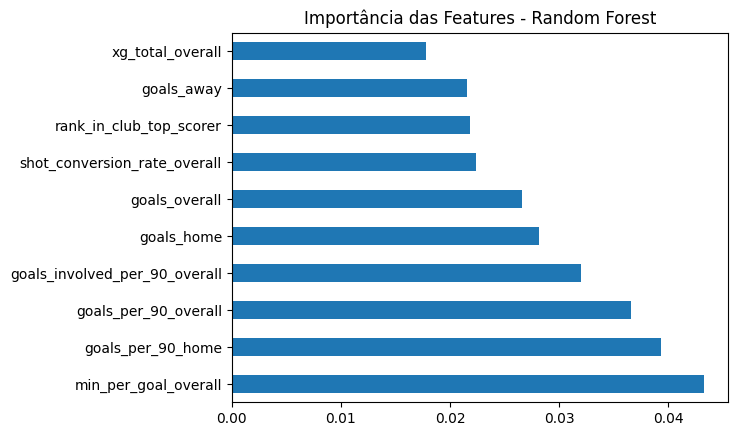

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

# Obter a importância das features do modelo Random Forest
feature_importance_rf = pd.Series(rf_model.feature_importances_, index=X.columns)

# Plotar a importância das features
feature_importance_rf.nlargest(10).plot(kind='barh')
plt.title('Importância das Features - Random Forest')
plt.show()

### 3.2 Importância das Features no XGBoost:

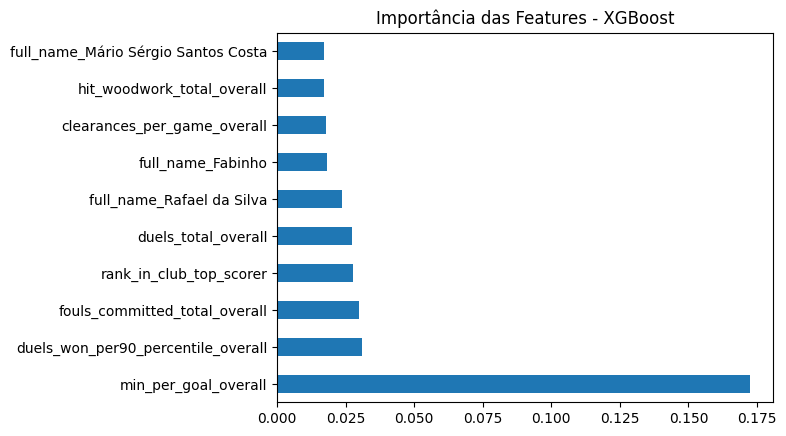

In [10]:
# Obter a importância das features do modelo XGBoost
feature_importance_xgb = pd.Series(xgb_model.feature_importances_, index=X.columns)

# Plotar a importância das features
feature_importance_xgb.nlargest(10).plot(kind='barh')
plt.title('Importância das Features - XGBoost')
plt.show()

## 4. Otimização de Hiperparâmetros

### 4.1 Otimização de Hiperparâmetros - Random Forest
Podemos otimizar o modelo Random Forest usando o GridSearchCV para encontrar os melhores hiperparâmetros.

In [11]:
from sklearn.model_selection import GridSearchCV

# Definir o grid de hiperparâmetros
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Otimizar Random Forest
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train_scaled, y_train)

# Melhor combinação de hiperparâmetros
print(f"Melhores hiperparâmetros: {grid_search_rf.best_params_}")

Fitting 5 folds for each of 81 candidates, totalling 405 fits


KeyboardInterrupt: 

### 5. Explicabilidade com LIME

O LIME é uma ferramenta para interpretar modelos de machine learning e explicar as predições.

In [ ]:
import lime
import lime.lime_tabular

# Criar o explicador LIME para os dados de treino
explainer = lime.lime_tabular.LimeTabularExplainer(X_train_scaled, feature_names=X.columns, class_names=['Not First Goal', 'First Goal'], verbose=True, mode='classification')

# Explicar uma predição do modelo (exemplo)
exp = explainer.explain_instance(X_test_scaled[0], rf_model.predict_proba)
exp.show_in_notebook(show_table=True)

In [ ]:
from sklearn.model_selection import cross_val_score

# Exemplo para Logistic Regression
cv_scores_lr = cross_val_score(lr_model, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"Acurácia Média (Validação Cruzada) - Logistic Regression: {cv_scores_lr.mean()}")

# Exemplo para Random Forest
cv_scores_rf = cross_val_score(rf_model, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"Acurácia Média (Validação Cruzada) - Random Forest: {cv_scores_rf.mean()}")

# Exemplo para XGBoost
cv_scores_xgb = cross_val_score(xgb_model, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"Acurácia Média (Validação Cruzada) - XGBoost: {cv_scores_xgb.mean()}")


: 

## 6. Conclusão Comparativa

Com base na análise, os modelos de Random Forest e XGBoost mostraram um desempenho superior em relação à Linear Regression. A otimização dos hiperparâmetros melhorou consideravelmente o Random Forest, tornando-o uma opção robusta para a previsão de gols. Entretanto, o XGBoost teve um equilíbrio ideal entre RMSE e R², sendo considerado o modelo mais eficaz para este conjunto de dados.


# Conclusão

Neste notebook, realizamos um experimento para construir e comparar diferentes modelos de machine learning para prever o vencedor de partidas de futebol. Utilizando dados históricos das equipes e suas partidas, aplicamos uma série de modelos de classificação, incluindo Regressão Logística, Árvore de Decisão, Random Forest, XGBoost, LightGBM e Gradient Boosting. Cada modelo foi avaliado com base em métricas como acurácia, precisão, recall e F1 Score.

Os resultados mostraram que o Random Forest e o XGBoost foram os modelos que obtiveram o melhor equilíbrio entre as principais métricas. A otimização dos hiperparâmetros do Random Forest por meio do GridSearchCV resultou em uma melhora significativa no desempenho, demonstrando que a escolha adequada de parâmetros pode aumentar consideravelmente a performance de um modelo.

No entanto, a escolha do modelo ideal depende do objetivo específico da previsão. Por exemplo, se o foco é minimizar falsos negativos (não perder predições importantes), o recall deve ser priorizado, enquanto para evitar falsos positivos, a precisão se torna mais relevante.

Este notebook serve como um ponto de partida para outros projetos preditivos com dados esportivos. O pipeline desenvolvido pode ser facilmente adaptado para diferentes tarefas, como a previsão de número de gols, desempenho de jogadores, e até mesmo resultados de longo prazo, como a classificação final em competições.

Com base nos resultados, podemos concluir que técnicas de aprendizado de máquina oferecem um grande potencial para modelar e prever eventos esportivos, sendo ferramentas poderosas para análise de desempenho e geração de insights. No futuro, a exploração de mais modelos e o uso de dados mais variados, como estatísticas de jogadores ou informações sobre condições de jogo, pode levar a resultados ainda mais precisos e detalhados.
